
Number of elements for each class (train data):
{2.0: 44, 1.0: 44, 3.0: 47}

Number of elements for each class (test data):
{2.0: 6, 1.0: 6, 3.0: 3}


Percent of errors with k= 1  :  4.666666666666666 %
Percent of errors with k= 2  :  4.666666666666666 %
Percent of errors with k= 3  :  4.0 %
Percent of errors with k= 4  :  4.0 %
Percent of errors with k= 5  :  3.3333333333333335 %
Percent of errors with k= 6  :  4.0 %
Percent of errors with k= 7  :  4.0 %
Percent of errors with k= 8  :  3.3333333333333335 %
Percent of errors with k= 9  :  2.666666666666667 %
Percent of errors with k= 10  :  3.3333333333333335 %
Percent of errors with k= 11  :  2.666666666666667 %
Percent of errors with k= 12  :  4.0 %
Percent of errors with k= 13  :  3.3333333333333335 %
Percent of errors with k= 14  :  2.666666666666667 %
Percent of errors with k= 15  :  2.666666666666667 %
Percent of errors with k= 16  :  3.3333333333333335 %
Percent of errors with k= 17  :  2.666666666666667 %
Percent of errors wit

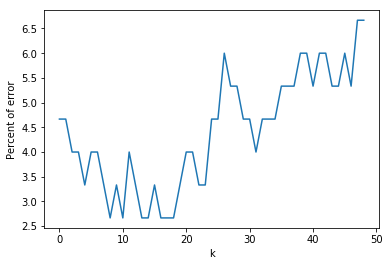

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt


def get_iris_class(name):
    if name == 'Iris-setosa':
        return 1.0
    elif name == 'Iris-versicolor':
        return 2.0
    elif name == 'Iris-virginica':
        return 3.0
    print(name)
    raise NameError('incorrect iris')


def get_data(address, shuffle=True):
    s = []
    with open(address) as file:
        for line in file:
            parts = line.split(",")
            if len(parts) > 4:
                last = parts[-1].strip()
                parts[-1] = get_iris_class(last)
                s.append([float(x) for x in parts])
    if shuffle:
        np.random.shuffle(s)
    return s


def split_data(samples, rate=0.9):
    train_num = int(len(samples)*rate)
    return samples[:train_num], samples[train_num:]


def get_class_counters(samples):
    counters = {}
    for s in samples:
        if s[-1] in counters:
            counters[s[-1]] += 1
        else:
            counters[s[-1]] = 1
    return counters


def get_neighbors_class(neighbors):
    counters = get_class_counters(neighbors)
    max_value = 0
    cur_key = None
    for key, value in counters.items():
        if value > max_value:
            max_value = value
            cur_key = key
    return cur_key


def euclidean_distance(x1, x2):
    distance = 0
    length = len(x1)
    for i in range(0, length, 1):
        try:
            distance += pow((x1[i] - x2[i]), 2)
        except TypeError:
            print(x1[i])
    return math.sqrt(distance)


def get_neighbors(samples, test, k):
    distances = []

    for s in samples:
        dist = euclidean_distance(test[:-1], s[:-1])
        distances.append((dist, s[-1]))
    distances.sort(key=lambda el: el[0])
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x])
    return neighbors


def cross_validation_split(data, n_folds):
    folds_data = list()
    fold_length = math.ceil(len(data)/n_folds)
    for i in range(0, n_folds):
        folds_data.append(data[fold_length*i: fold_length*(i + 1)])
    return folds_data


def split_fold_data(folds, i):
    test_fold = folds[i]
    train_fold = []
    for j in range(0, len(folds)):
        if i != j:
            train_fold = train_fold + folds[j]
    return train_fold, test_fold


def predict(train_fold, test_fold, k):
    predict_list = []
    for t in test_fold:
        neighbors = get_neighbors(train_fold, t, k)
        predict_list.append(get_neighbors_class(neighbors))
    return predict_list


def get_errors(test, predict):
    errors = 0.0
    for i in range(0, len(test)):
        if test[i][-1] != predict[i]:
            errors += 1.0
    return errors


def run_cross_validation(samples, k, n_folds=10):
    folds = cross_validation_split(samples, n_folds)
    accuracy = 0
    for i in range(0, len(folds)):
        train_fold, test_fold = split_fold_data(folds, i)
        predict_list = predict(train_fold, test_fold, k)
        errors = get_errors(test_fold, predict_list)
        accuracy = accuracy + errors/len(test_fold)
    accuracy = accuracy/n_folds
    print('Percent of errors with k=', str(k), ' : ', accuracy * 100, '%')
    return accuracy


def main():
    samples = get_data("./data/iris.data.txt")
    train, test = split_data(samples)

    print('\nNumber of elements for each class (train data):')
    print(get_class_counters(train))
    print('\nNumber of elements for each class (test data):')
    print(get_class_counters(test))
    print('\n')

    validation_results = []
    for k in range(1, 50, 1):
        error = run_cross_validation(samples, k, 15)
        validation_results.append((k, error))

    plt.figure(0)
    plt.plot([x[1]*100 for x in validation_results])
    plt.ylabel('Percent of error')
    plt.xlabel('k')
    # plt.xticks(range(1, 51, 1))

    validation_results.sort(key=lambda el: el[-1])

    best_k = validation_results[0][0]
    print('\nBest k = ', best_k)
    predict_list = predict(train, test, best_k)
    errors = get_errors(test, predict_list)
    print('\nPercent of error with the best k on test set : ', errors * 100, '%')

main()
plt.show()